In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import cmocean as cm
import cmocean as cm

In [2]:
#xarray data isolation  by coords
def sectionedArray(file, region):
    lats = np.array(file["latitude"])
    lons = np.array(file["longitude"])
    regionIndices = [np.where(lats == region[0])[0][0],np.where(lats == region[1])[0][0],np.where(lons == region[2])[0][0],np.where(lons == region[3])[0][0]]
    print(regionIndices)
    fileSectioned = file.isel(latitude = slice(regionIndices[1], regionIndices[0]), longitude = slice(regionIndices[2], regionIndices[3]))
    return fileSectioned

In [3]:
file2020 = xr.open_dataset("monthly/globMonthly20202024.grib")
file2010 = xr.open_dataset("monthly/globMonthly20102019sfcvars.grib")
file2000 = xr.open_dataset("monthly/globMonthly20002009sfcvars.grib")
file1990 = xr.open_dataset("monthly/globMonthly19901999sfcvars.grib")
file1980 = xr.open_dataset("monthly/globMonthly19801989sfcvars.grib")

In [4]:
# region = [27,30,76,79] #latS, latN, lonW, lonE
# file2020 = sectionedArray(file2020, region)
# file2010 = sectionedArray(file2010, region)
# file2000 = sectionedArray(file2000, region)
# file1990 = sectionedArray(file1990, region)
# file1980 = sectionedArray(file1980, region)

In [5]:
fileBank = [file1980, file1990, file2000, file2010, file2020]

In [6]:
# color range calculation for a list of year long time series, do determine the highest and lowest avg temps in the data plotted
plt.rcParams["figure.figsize"] = (25,10)
cmap = cm.cm.balance
colorRange = []
for file in [file2010, file2000, file1990, file1980]:
    timeSeries = pd.to_datetime(file["time"])
    for year in np.unique(timeSeries.year):
        print(year)
        mask = timeSeries.year == year
        plottingArray = np.nanmean(file["t2m"][mask], axis = (1,2))
        colorRange.append(np.nanmean(plottingArray))


2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989


In [7]:
#combine ERA files to form one long glob avg time series
ERA5timeSeries = []
ERA5time = []

#weighting with lats and averaging into a list, also making a list with timestamps
for file in fileBank:
    tempda =  file["t2m"]
    weights = np.cos(np.deg2rad(tempda.latitude))
    weights.name = "weights"
    fileWeighted = file["t2m"].weighted(weights)
    ERA5time.append(np.array(file["time"]))
    ERA5timeSeries.append(fileWeighted.mean(["longitude", "latitude"]))
    

In [8]:
#Running avg func
def RunningAvgs(array, window):
    windAvgArray = []
    for i in range(0, len(array) - window):
        windAvgArray.append(np.nanmean(array[i: i + window]))
    return windAvgArray

In [9]:
ERA5time = np.concatenate(ERA5time)
ERA5timeSeries = np.concatenate(ERA5timeSeries)

1980
0.20711073567045143
1981
0.3066163134487813
1982
0.03612512112102164
1983
0.16343263186663023
1984
0.10246217297324157
1985
0.00019876270217893612
1986
0.024745956421277547
1987
0.024621729732415713
1988
0.20882506397674477
1989
0.08094611046237174
1990
0.383562324529802
1991
0.316951973962086
1992
0.056895823498720466
1993
0.010435041864394146
1994
0.012522050237272975
1995
0.2636835697781311
1996
0.20840269323461452
1997
0.20542125270193048
1998
0.3269149544088052
1999
0.16770602996347736
2000
0.1904892047007379
2001
0.3270640264354394
2002
0.46773832890258144
2003
0.3767547019801734
2004
0.2855226216800417
2005
0.5768093617232726
2006
0.49658376605629956
2007
0.5510695917911004
2008
0.36987254341722775
2009
0.4933041814703471
2010
0.5292802305647345
2011
0.539740117766901
2012
0.5393425923625431
2013
0.5204849809933166
2014
0.554498248403687
2015
0.6076921165743249
2016
0.9091157544286814
2017
0.7831747372605531
2018
0.7903550398767671
2019
0.8161941911600288
2020
0.90519019106

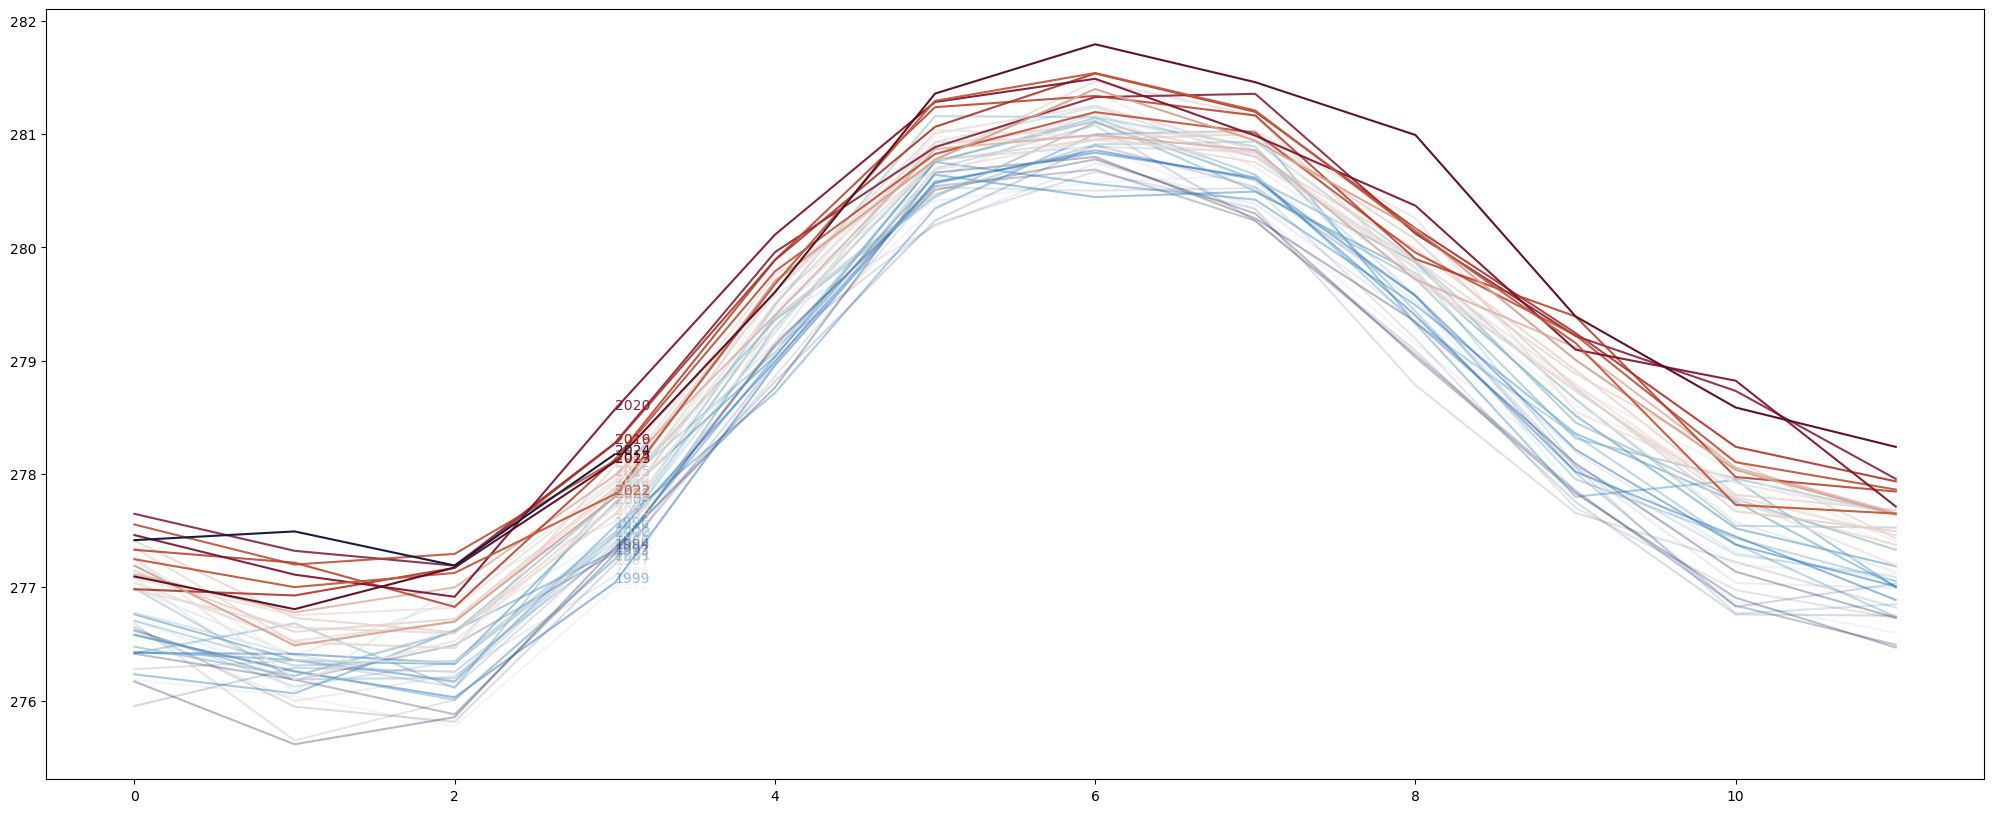

In [10]:
cmap = cm.cm.balance
for file in fileBank:
    timeSeries = pd.to_datetime(file["time"])        
    for year in np.unique(timeSeries.year):
        mask = timeSeries.year == year
        colorAssgn = (np.nanmean(file["t2m"][mask]) - min(colorRange))/((max(colorRange) - min(colorRange))*1.1)
        print(year)
        print(colorAssgn)
        plottingArray = np.nanmean(file["t2m"][mask], axis = (1,2))
        plt.plot(plottingArray, color = cmap(colorAssgn), alpha = (year - 1980)/(44))
        plt.text(3,(plottingArray)[3],str(year), color = cmap(colorAssgn), alpha = (year - 1980)/(44)) 

In [11]:
timeSeries_19912020_ERA5 = ERA5timeSeries[(ERA5time > pd.to_datetime("1990-12-31")) &(ERA5time < pd.to_datetime("2021-01-01"))]
ref_clim_19912020_ERA5 = np.nanmean(np.reshape(timeSeries_19912020_ERA5, (-1,12)), axis = 0)

In [12]:
absTemps19501980 = [12.23,12.44,13.06,13.97,14.94,15.66,15.95,15.78,15.19,14.25,13.23,12.49]
absTemps19501980unc = [0.03,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.04,0.03,0.04,0.04]

In [13]:
window = 60
ERA560monAvgAnom1950_80 = RunningAvgs(ERA5timeSeries - 273.15 - np.resize(absTemps19501980, (len(ERA5timeSeries))), window)
window = 60
ERA560monAvgAnom1991_2020 = RunningAvgs(ERA5timeSeries - np.resize(ref_clim_19912020_ERA5, (len(ERA5timeSeries))), window)

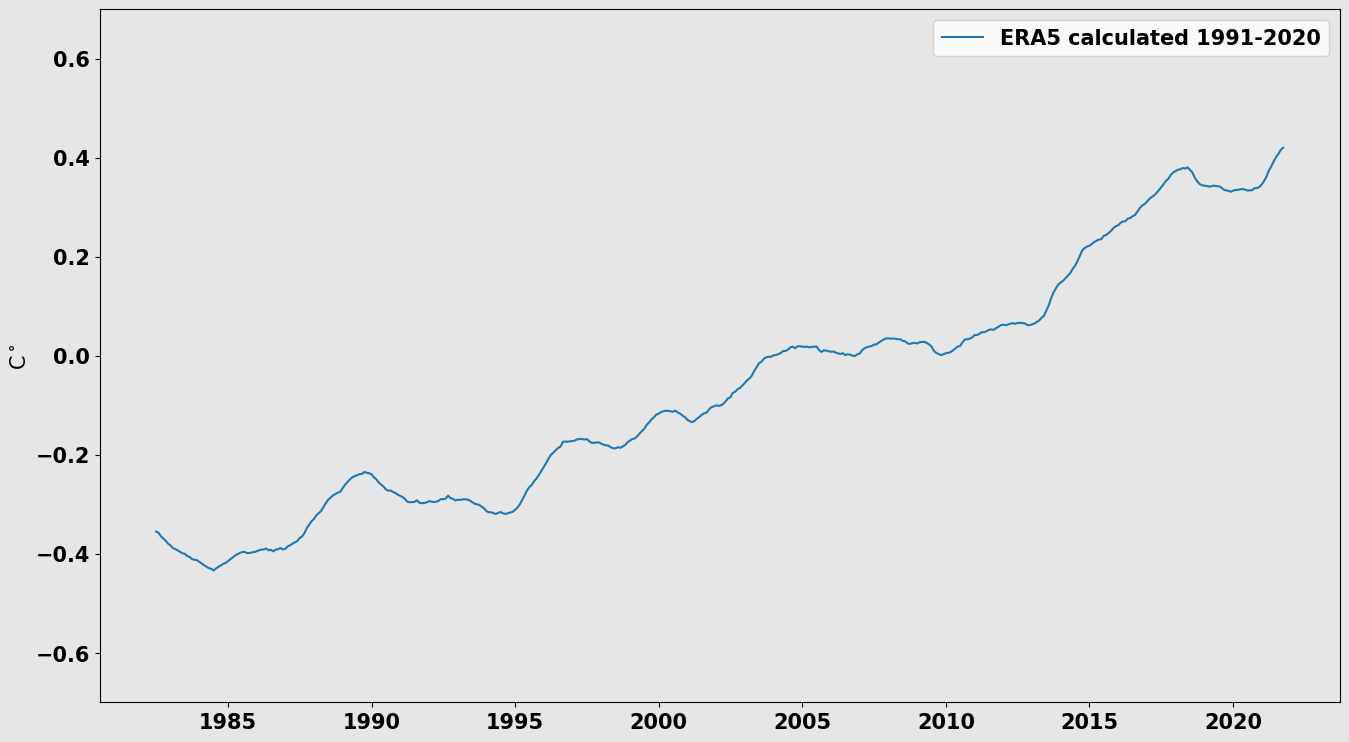

In [ ]:
DateRange = pd.date_range("1940-01-01", "2019-02-01", freq="M")
plt.rcParams["figure.figsize"] = (16,9)
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(facecolor=(0.9,0.9,0.9,1))
ax = plt.axes()
ax.set_facecolor((0.9,0.9,0.9,1))
plt.ylabel("C$^\circ$")
plt.ylim(-0.7,0.7)
#plt.plot(ERA5time[:len(ERA560monAvgAnom1950_80)], ERA560monAvgAnom1950_80, label = "ERA5 calculated 1950-1980")
plt.plot(ERA5time[int(window/2):len(ERA560monAvgAnom1950_80) + int(window/2)], ERA560monAvgAnom1991_2020, label = "ERA5 calculated 1991-2020")
for i in range (0,101):
    scatter = plt.scatter(ERA5time[int(window/2):len(ERA560monAvgAnom1950_80) + int(window/2)],
                          ERA560monAvgAnom1991_2020 + (i/100)*((ERA5timeSeries - np.resize(ref_clim_19912020_ERA5, (len(ERA5timeSeries))))[int(window/2):len(ERA560monAvgAnom1950_80) + int(window/2)] - ERA560monAvgAnom1991_2020),
                          c = (ERA5timeSeries - np.resize(ref_clim_19912020_ERA5, (len(ERA5timeSeries))))[int(window/2):len(ERA560monAvgAnom1950_80) + int(window/2)] - ERA560monAvgAnom1991_2020,
                          label = "", cmap = cm.cm.balance, alpha = i/100)
    plt.legend()
    plt.savefig("reel2/unsmoothen animation/unscatterframe" + str(i))
    scatter.remove()

In [20]:
file2020

<xarray.Dataset>
Dimensions:     (time: 52, latitude: 721, longitude: 1440)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2024-04-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    d2m         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 247.0 247.0 ... 221.7 221.7
    sp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-06-06T17:51 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
region = [-30,30,0,359.75] #latS, latN, lonW, lonE
file2020_tropics = sectionedArray(file2020, region)
file2010_tropics = sectionedArray(file2010, region)
file2000_tropics = sectionedArray(file2000, region)
file1990_tropics = sectionedArray(file1990, region)
file1980_tropics = sectionedArray(file1980, region)

[480, 240, 0, 1439]
[480, 240, 0, 1439]
[480, 240, 0, 1439]
[480, 240, 0, 1439]
[480, 240, 0, 1439]


In [15]:
fileBank_tropics = [file1980_tropics, file1990_tropics, file2000_tropics, file2010_tropics, file2020_tropics]

In [16]:
#combine ERA files to form one long glob avg time series
ERA5timeSeries_tropics = []
ERA5time_tropics = []

#weighting with lats and averaging into a list, also making a list with timestamps
for file in fileBank_tropics:
    tempda =  file["t2m"]
    weights = np.cos(np.deg2rad(tempda.latitude))
    weights.name = "weights"
    fileWeighted = file["t2m"].weighted(weights)
    ERA5time_tropics.append(np.array(file["time"]))
    ERA5timeSeries_tropics.append(fileWeighted.mean(["longitude", "latitude"]))
    

In [17]:
ERA5time_tropics = np.concatenate(ERA5time_tropics)
ERA5timeSeries_tropics = np.concatenate(ERA5timeSeries_tropics)

In [18]:
timeSeries_19912020_ERA5_tropics = ERA5timeSeries_tropics[(ERA5time_tropics > pd.to_datetime("1990-12-31")) &(ERA5time_tropics < pd.to_datetime("2021-01-01"))]
ref_clim_19912020_ERA5_tropics = np.nanmean(np.reshape(timeSeries_19912020_ERA5_tropics, (-1,12)), axis = 0)

In [19]:

window = 60
ERA560monAvgAnom1991_2020_tropics = RunningAvgs(ERA5timeSeries_tropics - np.resize(ref_clim_19912020_ERA5_tropics, (len(ERA5timeSeries_tropics))), window)

In [20]:
region = [30,66.5,0,359.75] #latS, latN, lonW, lonE
file2020_TemperateN = sectionedArray(file2020, region)
file2010_TemperateN = sectionedArray(file2010, region)
file2000_TemperateN = sectionedArray(file2000, region)
file1990_TemperateN = sectionedArray(file1990, region)
file1980_TemperateN = sectionedArray(file1980, region)

[240, 94, 0, 1439]
[240, 94, 0, 1439]
[240, 94, 0, 1439]
[240, 94, 0, 1439]
[240, 94, 0, 1439]


In [21]:
fileBank_TemperateN = [file1980_TemperateN, file1990_TemperateN, file2000_TemperateN, file2010_TemperateN, file2020_TemperateN]

In [22]:
#combine ERA files to form one long glob avg time series
ERA5timeSeries_TemperateN = []
ERA5time_TemperateN = []

#weighting with lats and averaging into a list, also making a list with timestamps
for file in fileBank_TemperateN:
    tempda =  file["t2m"]
    weights = np.cos(np.deg2rad(tempda.latitude))
    weights.name = "weights"
    fileWeighted = file["t2m"].weighted(weights)
    ERA5time_TemperateN.append(np.array(file["time"]))
    ERA5timeSeries_TemperateN.append(fileWeighted.mean(["longitude", "latitude"]))
    

In [23]:
ERA5time_TemperateN = np.concatenate(ERA5time_TemperateN)
ERA5timeSeries_TemperateN = np.concatenate(ERA5timeSeries_TemperateN)

In [24]:
timeSeries_19912020_ERA5_TemperateN = ERA5timeSeries_TemperateN[(ERA5time_TemperateN > pd.to_datetime("1990-12-31")) &(ERA5time_TemperateN < pd.to_datetime("2021-01-01"))]
ref_clim_19912020_ERA5_TemperateN = np.nanmean(np.reshape(timeSeries_19912020_ERA5_TemperateN, (-1,12)), axis = 0)

In [25]:

window = 60
ERA560monAvgAnom1991_2020_TemperateN = RunningAvgs(ERA5timeSeries_TemperateN - np.resize(ref_clim_19912020_ERA5_TemperateN, (len(ERA5timeSeries_TemperateN))), window)

In [26]:
region = [-66.5,-30,0,359.75] #latS, latN, lonW, lonE
file2020_TemperateS = sectionedArray(file2020, region)
file2010_TemperateS = sectionedArray(file2010, region)
file2000_TemperateS = sectionedArray(file2000, region)
file1990_TemperateS = sectionedArray(file1990, region)
file1980_TemperateS = sectionedArray(file1980, region)

[626, 480, 0, 1439]
[626, 480, 0, 1439]
[626, 480, 0, 1439]
[626, 480, 0, 1439]
[626, 480, 0, 1439]


In [27]:
fileBank_TemperateS = [file1980_TemperateS, file1990_TemperateS, file2000_TemperateS, file2010_TemperateS, file2020_TemperateS]

In [28]:
#combine ERA files to form one long glob avg time series
ERA5timeSeries_TemperateS = []
ERA5time_TemperateS = []

#weighting with lats and averaging into a list, also making a list with timestamps
for file in fileBank_TemperateS:
    tempda =  file["t2m"]
    weights = np.cos(np.deg2rad(tempda.latitude))
    weights.name = "weights"
    fileWeighted = file["t2m"].weighted(weights)
    ERA5time_TemperateS.append(np.array(file["time"]))
    ERA5timeSeries_TemperateS.append(fileWeighted.mean(["longitude", "latitude"]))
    

In [29]:
ERA5time_TemperateS = np.concatenate(ERA5time_TemperateS)
ERA5timeSeries_TemperateS = np.concatenate(ERA5timeSeries_TemperateS)

In [30]:
timeSeries_19912020_ERA5_TemperateS = ERA5timeSeries_TemperateS[(ERA5time_TemperateS > pd.to_datetime("1990-12-31")) &(ERA5time_TemperateS < pd.to_datetime("2021-01-01"))]
ref_clim_19912020_ERA5_TemperateS = np.nanmean(np.reshape(timeSeries_19912020_ERA5_TemperateS, (-1,12)), axis = 0)

In [31]:

window = 60
ERA560monAvgAnom1991_2020_TemperateS = RunningAvgs(ERA5timeSeries_TemperateS - np.resize(ref_clim_19912020_ERA5_TemperateS, (len(ERA5timeSeries_TemperateS))), window)

In [32]:
region = [-90,-66.5,0,359.75] #latS, latN, lonW, lonE
file2020_Ant = sectionedArray(file2020, region)
file2010_Ant = sectionedArray(file2010, region)
file2000_Ant = sectionedArray(file2000, region)
file1990_Ant = sectionedArray(file1990, region)
file1980_Ant = sectionedArray(file1980, region)

[720, 626, 0, 1439]
[720, 626, 0, 1439]
[720, 626, 0, 1439]
[720, 626, 0, 1439]
[720, 626, 0, 1439]


In [33]:
fileBank_Ant = [file1980_Ant, file1990_Ant, file2000_Ant, file2010_Ant, file2020_Ant]

In [34]:
#combine ERA files to form one long glob avg time series
ERA5timeSeries_Ant = []
ERA5time_Ant = []

#weighting with lats and averaging into a list, also making a list with timestamps
for file in fileBank_Ant:
    tempda =  file["t2m"]
    weights = np.cos(np.deg2rad(tempda.latitude))
    weights.name = "weights"
    fileWeighted = file["t2m"].weighted(weights)
    ERA5time_Ant.append(np.array(file["time"]))
    ERA5timeSeries_Ant.append(fileWeighted.mean(["longitude", "latitude"]))
    

In [35]:
ERA5time_Ant = np.concatenate(ERA5time_Ant)
ERA5timeSeries_Ant = np.concatenate(ERA5timeSeries_Ant)

In [36]:
timeSeries_19912020_ERA5_Ant = ERA5timeSeries_Ant[(ERA5time_Ant > pd.to_datetime("1990-12-31")) &(ERA5time_Ant < pd.to_datetime("2021-01-01"))]
ref_clim_19912020_ERA5_Ant = np.nanmean(np.reshape(timeSeries_19912020_ERA5_Ant, (-1,12)), axis = 0)

In [37]:

window = 60
ERA560monAvgAnom1991_2020_Ant = RunningAvgs(ERA5timeSeries_Ant - np.resize(ref_clim_19912020_ERA5_Ant, (len(ERA5timeSeries_Ant))), window)

In [38]:
region = [66.5,90,0,359.75] #latS, latN, lonW, lonE
file2020_Arc = sectionedArray(file2020, region)
file2010_Arc = sectionedArray(file2010, region)
file2000_Arc = sectionedArray(file2000, region)
file1990_Arc = sectionedArray(file1990, region)
file1980_Arc = sectionedArray(file1980, region)

[94, 0, 0, 1439]
[94, 0, 0, 1439]
[94, 0, 0, 1439]
[94, 0, 0, 1439]
[94, 0, 0, 1439]


In [39]:
fileBank_Arc = [file1980_Arc, file1990_Arc, file2000_Arc, file2010_Arc, file2020_Arc]

In [40]:
#combine ERA files to form one long glob avg time series
ERA5timeSeries_Arc = []
ERA5time_Arc = []

#weighting with lats and averaging into a list, also making a list with timestamps
for file in fileBank_Arc:
    tempda =  file["t2m"]
    weights = np.cos(np.deg2rad(tempda.latitude))
    weights.name = "weights"
    fileWeighted = file["t2m"].weighted(weights)
    ERA5time_Arc.append(np.array(file["time"]))
    ERA5timeSeries_Arc.append(fileWeighted.mean(["longitude", "latitude"]))
    

In [41]:
ERA5time_Arc = np.concatenate(ERA5time_Arc)
ERA5timeSeries_Arc = np.concatenate(ERA5timeSeries_Arc)

In [42]:
timeSeries_19912020_ERA5_Arc = ERA5timeSeries_Arc[(ERA5time_Arc > pd.to_datetime("1990-12-31")) &(ERA5time_Arc < pd.to_datetime("2021-01-01"))]
ref_clim_19912020_ERA5_Arc = np.nanmean(np.reshape(timeSeries_19912020_ERA5_Arc, (-1,12)), axis = 0)

In [43]:

window = 60
ERA560monAvgAnom1991_2020_Arc = RunningAvgs(ERA5timeSeries_Arc - np.resize(ref_clim_19912020_ERA5_Arc, (len(ERA5timeSeries_Arc))), window)

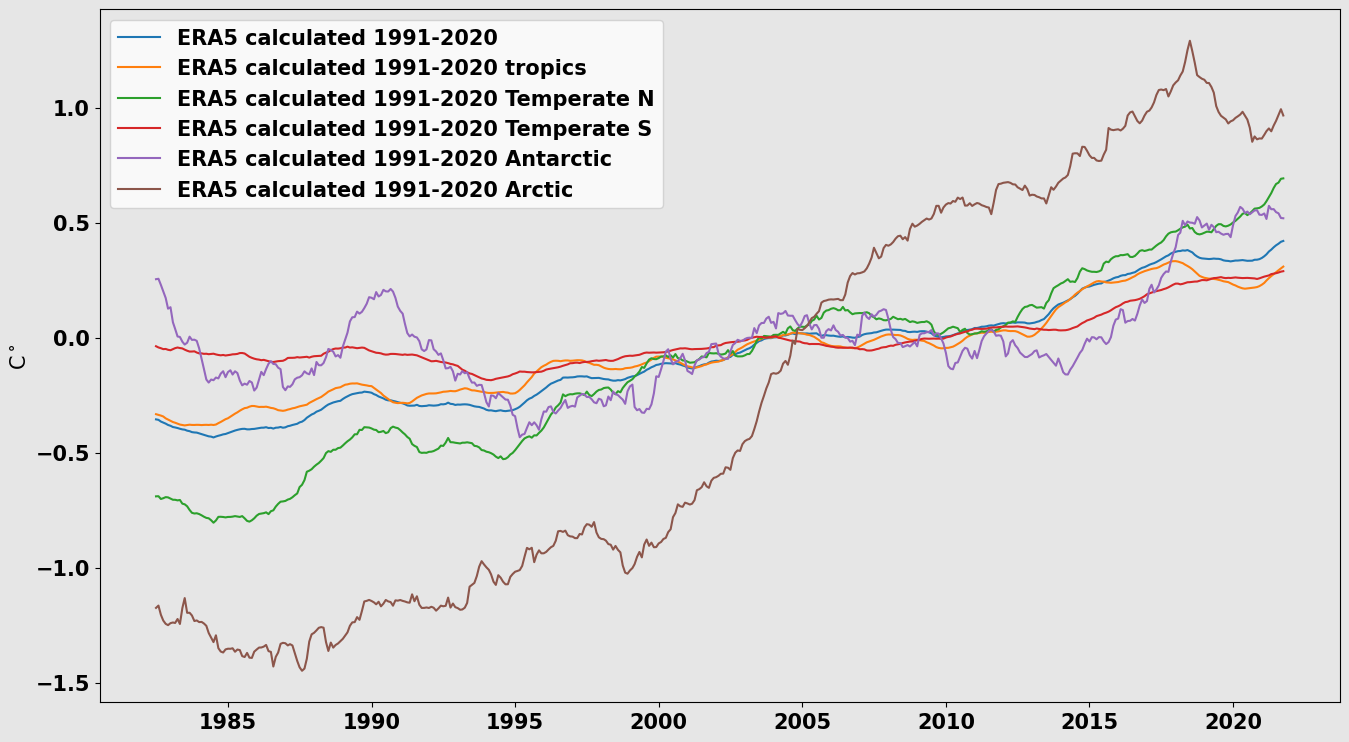

In [44]:
DateRange = pd.date_range("1940-01-01", "2019-02-01", freq="M")
plt.rcParams["figure.figsize"] = (16,9)
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(facecolor=(0.9,0.9,0.9,1))
ax = plt.axes()
ax.set_facecolor((0.9,0.9,0.9,1))
plt.ylabel("C$^\circ$")

#plt.plot(ERA5time[:len(ERA560monAvgAnom1950_80)], ERA560monAvgAnom1950_80, label = "ERA5 calculated 1950-1980")
plt.plot(ERA5time[int(window/2):len(ERA560monAvgAnom1950_80) + int(window/2)],                          ERA560monAvgAnom1991_2020,              label = "ERA5 calculated 1991-2020")
plt.plot(ERA5time_tropics[int(window/2):len(ERA560monAvgAnom1991_2020_tropics) + int(window/2)],        ERA560monAvgAnom1991_2020_tropics,      label = "ERA5 calculated 1991-2020 tropics")
plt.plot(ERA5time_TemperateN[int(window/2):len(ERA560monAvgAnom1991_2020_TemperateN) + int(window/2)],  ERA560monAvgAnom1991_2020_TemperateN,   label = "ERA5 calculated 1991-2020 Temperate N")
plt.plot(ERA5time_TemperateS[int(window/2):len(ERA560monAvgAnom1991_2020_TemperateS) + int(window/2)],  ERA560monAvgAnom1991_2020_TemperateS,   label = "ERA5 calculated 1991-2020 Temperate S")
plt.plot(ERA5time_Ant[int(window/2):len(ERA560monAvgAnom1991_2020_Ant) + int(window/2)],                ERA560monAvgAnom1991_2020_Ant,          label = "ERA5 calculated 1991-2020 Antarctic")
plt.plot(ERA5time_Arc[int(window/2):len(ERA560monAvgAnom1991_2020_Arc) + int(window/2)],                ERA560monAvgAnom1991_2020_Arc,          label = "ERA5 calculated 1991-2020 Arctic")
plt.legend()

In [45]:
ERA560monAvgAnom1991_2020 = np.array(ERA560monAvgAnom1991_2020)
ERA560monAvgAnom1991_2020_tropics = np.array(ERA560monAvgAnom1991_2020_tropics)
ERA560monAvgAnom1991_2020_TemperateN = np.array(ERA560monAvgAnom1991_2020_TemperateN)
ERA560monAvgAnom1991_2020_TemperateS = np.array(ERA560monAvgAnom1991_2020_TemperateS)
ERA560monAvgAnom1991_2020_Ant = np.array(ERA560monAvgAnom1991_2020_Ant)
ERA560monAvgAnom1991_2020_Arc = np.array(ERA560monAvgAnom1991_2020_Arc)

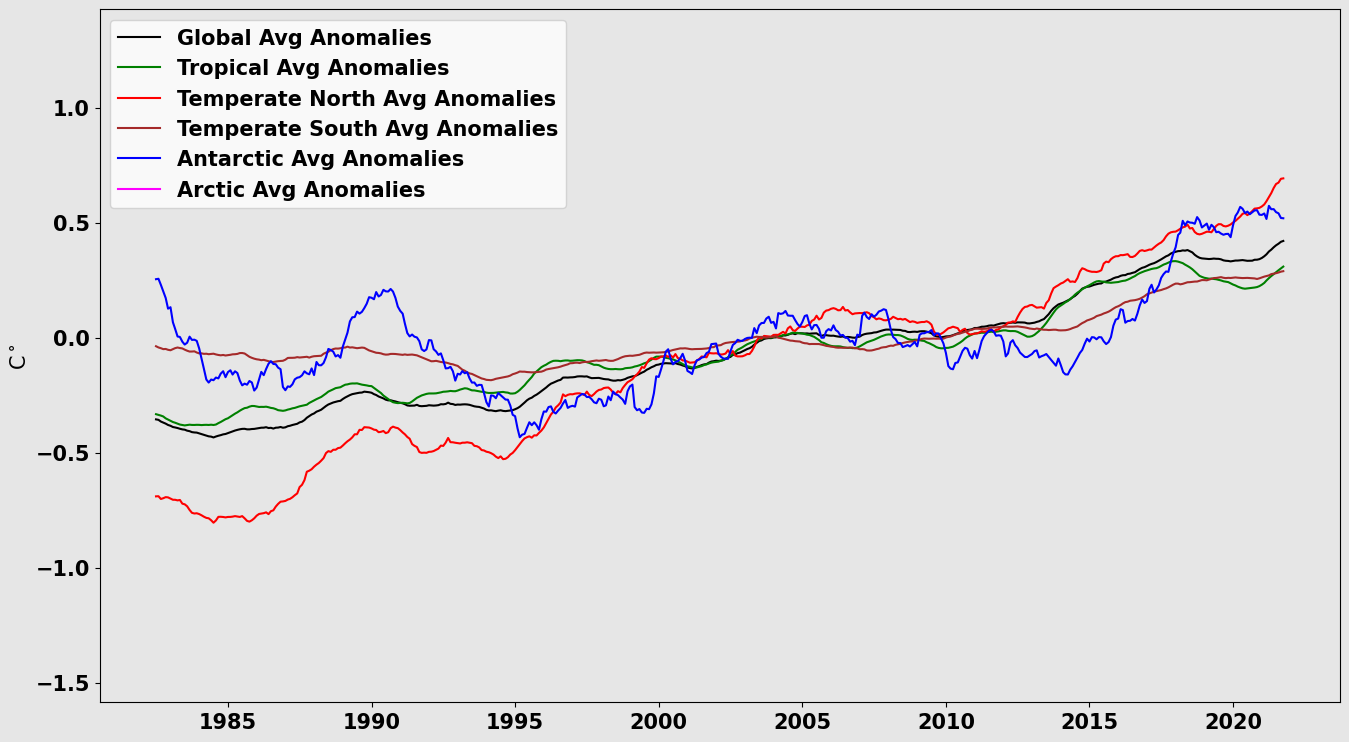

In [54]:
DateRange = pd.date_range("1940-01-01", "2019-02-01", freq="M")
plt.rcParams["figure.figsize"] = (16,9)
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(facecolor=(0.9,0.9,0.9,1))
ax = plt.axes()
ax.set_facecolor((0.9,0.9,0.9,1))
plt.ylabel("C$^\circ$")
time = ERA5time[int(window/2):len(ERA560monAvgAnom1950_80) + int(window/2)]
#plt.plot(ERA5time[:len(ERA560monAvgAnom1950_80)], ERA560monAvgAnom1950_80, label = "ERA5 calculated 1950-1980")
plt.plot(time,  ERA560monAvgAnom1991_2020, label = "Global Avg Anomalies", color = "black")

plt.plot(time,
        ERA560monAvgAnom1991_2020_tropics,
        label = "Tropical Avg Anomalies",color = "green")
plt.plot(time,
        ERA560monAvgAnom1991_2020_TemperateN,
        label = "Temperate North Avg Anomalies",color = "red")
plt.plot(time,
        ERA560monAvgAnom1991_2020_TemperateS,
        label = "Temperate South Avg Anomalies",color = "brown")
plt.plot(time,
        ERA560monAvgAnom1991_2020_Ant,
        label = "Antarctic Avg Anomalies",color = "blue")
# Arc     = plt.plot(time,
#                         (ERA560monAvgAnom1991_2020_Arc - ERA560monAvgAnom1991_2020)*(i/200) + ERA560monAvgAnom1991_2020,
#                         label = "Arctic Avg Anomalies",color = "skyblue")


for i in range(0,101):
        alpha_set = i/100
        if alpha_set >1:
                alpha_set = 1 
        # trop    = plt.plot(time,
        #                    (ERA560monAvgAnom1991_2020_tropics - ERA560monAvgAnom1991_2020)*(i/100) + ERA560monAvgAnom1991_2020,
        #                    label = "Tropical Avg Anomalies",color = "green", alpha = alpha_set)
        # tempN   = plt.plot(time,
        #                    (ERA560monAvgAnom1991_2020_TemperateN - ERA560monAvgAnom1991_2020)*(i/100) + ERA560monAvgAnom1991_2020,
        #                    label = "Temperate North Avg Anomalies",color = "red", alpha = alpha_set)
        # tempS   = plt.plot(time,
        #                    (ERA560monAvgAnom1991_2020_TemperateS - ERA560monAvgAnom1991_2020)*(i/100) + ERA560monAvgAnom1991_2020,
        #                    label = "Temperate South Avg Anomalies",color = "brown", alpha = alpha_set)
        # Ant     = plt.plot(time,
        #                    (ERA560monAvgAnom1991_2020_Ant - ERA560monAvgAnom1991_2020)*(i/100) + ERA560monAvgAnom1991_2020,
        #                    label = "Antarctic Avg Anomalies",color = "blue", alpha = alpha_set)
        Arc     = plt.plot(time,
                           (ERA560monAvgAnom1991_2020_Arc - ERA560monAvgAnom1991_2020)*(i/100) + ERA560monAvgAnom1991_2020,
                           label = "Arctic Avg Anomalies",color = "fuchsia", alpha = alpha_set)
        plt.legend()
        plt.savefig("reel2/lats separation animation/frameArctic" +  str(i))
        # for item in trop:
        #         item.remove()
        # for item in tempN:
        #         item.remove()
        # for item in tempS:
        #         item.remove()
        # for item in Ant:
        #         item.remove()
        for item in Arc:
                item.remove()
        
    

In [46]:
ONI = pd.read_csv("data/El Nino/oni_ascii.csv")

In [47]:
ONI

SEAS    YR  TOTAL  ANOM
0    DJF  1950  24.72 -1.53
1    JFM  1950  25.17 -1.34
2    FMA  1950  25.75 -1.16
3    MAM  1950  26.12 -1.18
4    AMJ  1950  26.32 -1.07
..   ...   ...    ...   ...
886  OND  2023  28.60  1.92
887  NDJ  2023  28.57  1.95
888  DJF  2024  28.43  1.79
889  JFM  2024  28.36  1.49
890  FMA  2024  28.44  1.15

[891 rows x 4 columns]

In [48]:
DateRangeONI = pd.date_range("1950-01-01", "2024-04-01", freq="M")

In [49]:
DateRangeONI

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31'],
              dtype='datetime64[ns]', length=891, freq='M')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x900 with 0 Axes>

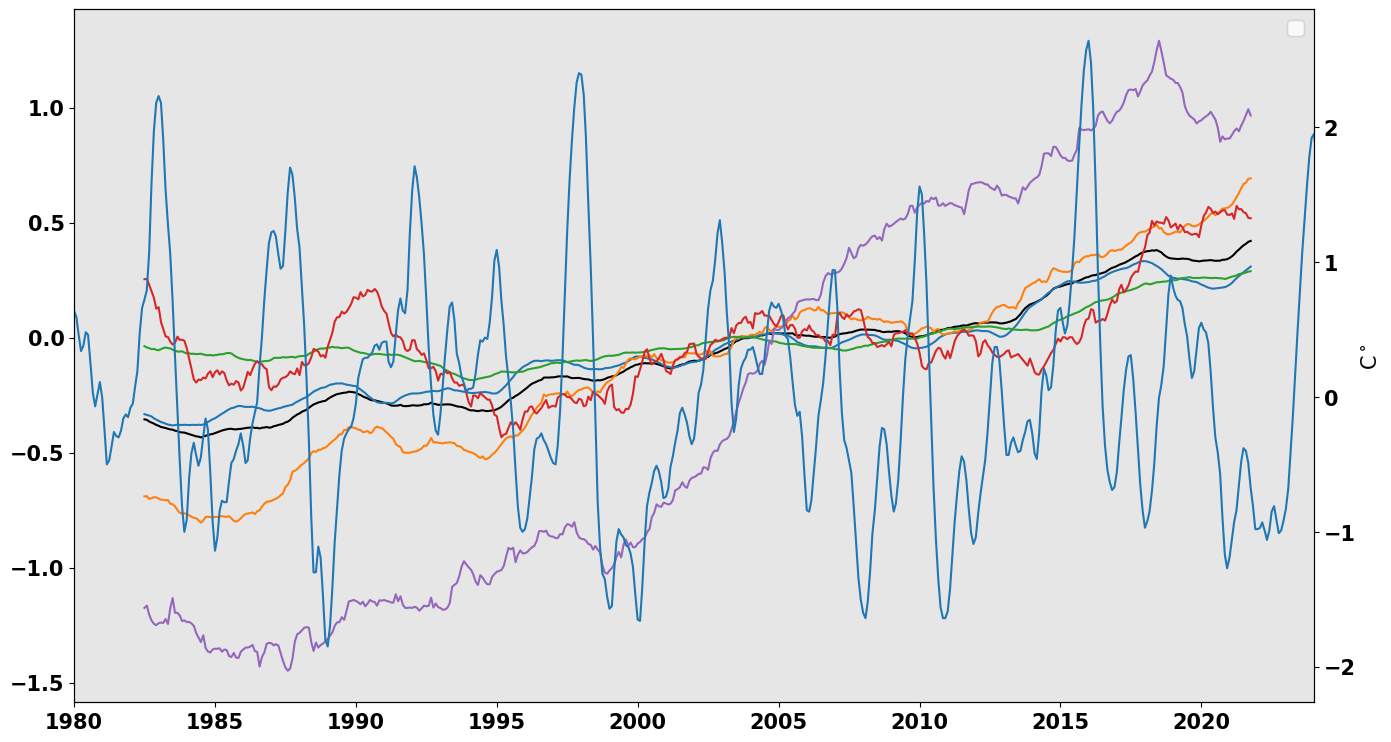

In [64]:
DateRange = pd.date_range("1940-01-01", "2019-02-01", freq="M")
plt.rcParams["figure.figsize"] = (16,9)
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(facecolor=(0.9,0.9,0.9,1))
fig, ax1 = plt.subplots() 
ax1.set_facecolor((0.9,0.9,0.9,1))
ax2 = ax1.twinx()
plt.ylabel("C$^\circ$")

#plt.plot(ERA5time[:len(ERA560monAvgAnom1950_80)], ERA560monAvgAnom1950_80, label = "ERA5 calculated 1950-1980")
ax1.plot(ERA5time[int(window/2):len(ERA560monAvgAnom1950_80) + int(window/2)],                          ERA560monAvgAnom1991_2020,              label = "ERA5 calculated 1991-2020", color = "black")
ax1.plot(ERA5time_tropics[int(window/2):len(ERA560monAvgAnom1991_2020_tropics) + int(window/2)],        ERA560monAvgAnom1991_2020_tropics,      label = "ERA5 calculated 1991-2020 tropics")
ax1.plot(ERA5time_TemperateN[int(window/2):len(ERA560monAvgAnom1991_2020_TemperateN) + int(window/2)],  ERA560monAvgAnom1991_2020_TemperateN,   label = "ERA5 calculated 1991-2020 Temperate N")
ax1.plot(ERA5time_TemperateS[int(window/2):len(ERA560monAvgAnom1991_2020_TemperateS) + int(window/2)],  ERA560monAvgAnom1991_2020_TemperateS,   label = "ERA5 calculated 1991-2020 Temperate S")
ax1.plot(ERA5time_Ant[int(window/2):len(ERA560monAvgAnom1991_2020_Ant) + int(window/2)],                ERA560monAvgAnom1991_2020_Ant,          label = "ERA5 calculated 1991-2020 Antarctic")
ax1.plot(ERA5time_Arc[int(window/2):len(ERA560monAvgAnom1991_2020_Arc) + int(window/2)],                ERA560monAvgAnom1991_2020_Arc,          label = "ERA5 calculated 1991-2020 Arctic")
ax2.plot(DateRangeONI,ONI["ANOM"])
ax2.set_xlim(pd.to_datetime("1980-01-01"), pd.to_datetime("2024-01-01"))
plt.legend()

In [50]:
import os
import glob

os.chdir('C:/code/climateVis')
files = glob.glob('data/ice/dataset-satellite-sea-ice-concentration/*.nc')

In [94]:
files[0]

'data/ice/dataset-satellite-sea-ice-concentration\\ice_conc_nh_ease2-250_cdr-v3p0_198001.nc'

In [51]:
seaicetest = xr.open_dataset(str(files[0]))

In [52]:
np.min(seaicetest["ice_conc"][0])

<xarray.DataArray 'ice_conc' ()>
array(0.)
Coordinates:
    time     datetime64[ns] 1980-01-16T12:00:00

In [53]:
len(seaicetest["xc"])

432

In [54]:
len(seaicetest["yc"])

432

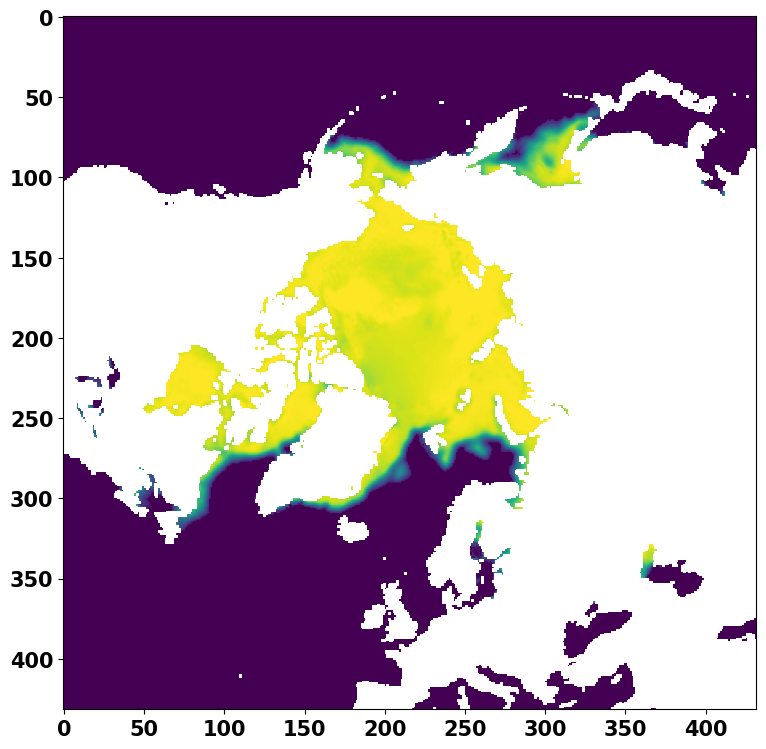

In [55]:
plt.imshow(seaicetest["ice_conc"][0])

In [56]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

KeyboardInterrupt: 

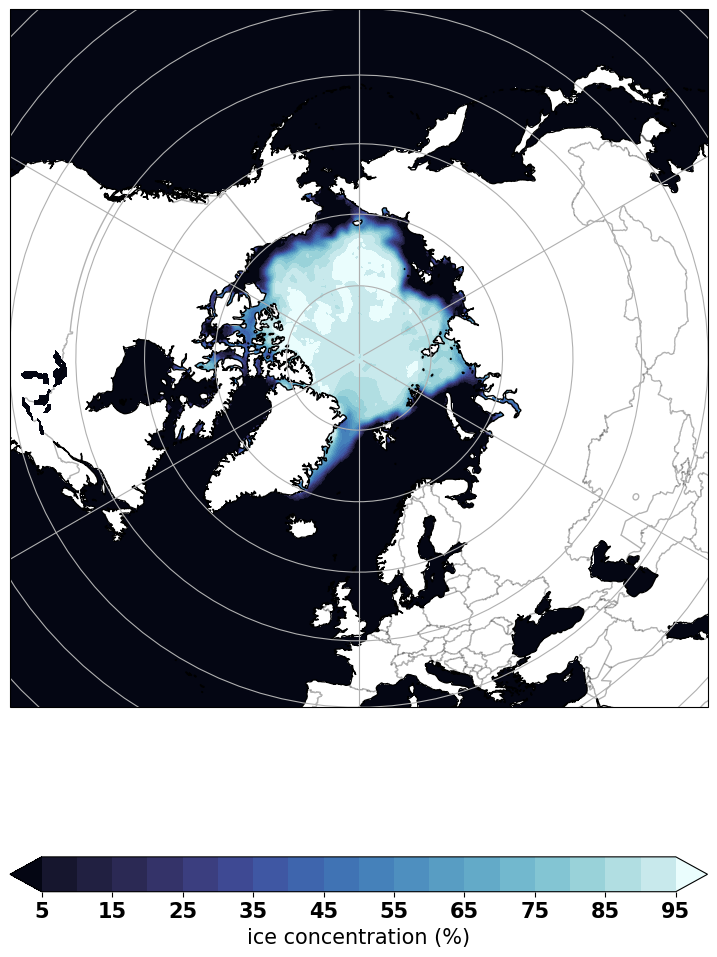

In [57]:
i = 0
for file in files:
    
    plt.rcParams["figure.figsize"] = (9,13)
    ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(0,90))
    seaicetest = xr.open_dataset(str(file))
    if pd.to_datetime(seaicetest["time"]).month == 9:
        plt.contourf(seaicetest["xc"]*1000, seaicetest["yc"]*1000, seaicetest["ice_conc"][0], 20, 
                    transform=ccrs.LambertAzimuthalEqualArea(0,90), extend = "both", cmap = cm.cm.ice, vmin = 0, vmax = 100)

        plt.colorbar(label = "ice concentration (%)", orientation = "horizontal", location = "bottom")
        plt.yticks()
        plt.xticks()

        ax.coastlines(resolution='50m')
        # ax.add_feature(cfeature.STATES.with_scale('10m'),
        #             linestyle='--', alpha=.1)
        ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                    linestyle='-', alpha=.3)

        gl = ax.gridlines(draw_labels=False)
        plt.savefig("reel2/arctic sea ice/frame" + str(i).zfill(4))
        i = i + 1
    plt.clf()

In [62]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [63]:
def colorpolate(color1, color2):
    colors = []
    for i in range(0,256):
        colors.append(color1 + (color2 - color1)*(i/256))
    return colors

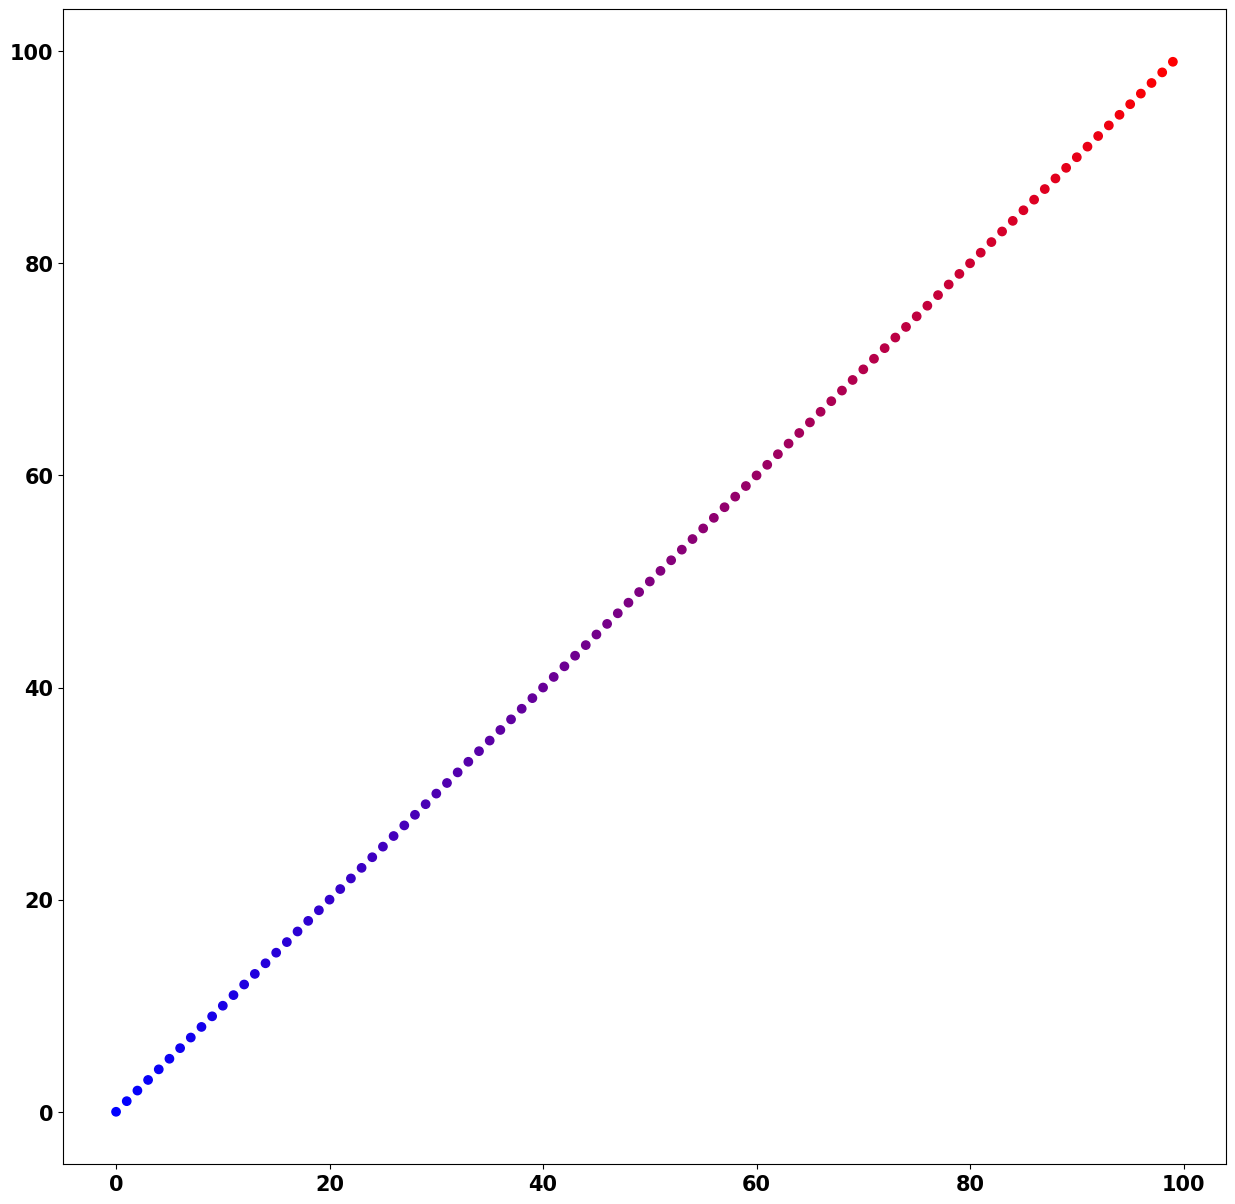

In [64]:
redblueColors = colorpolate(np.array([0,0,1,1]),np.array([1,0,0,1]))
rbcmap = ListedColormap(redblueColors)
plt.scatter(range(100), range(100), c= range(100), cmap = rbcmap)


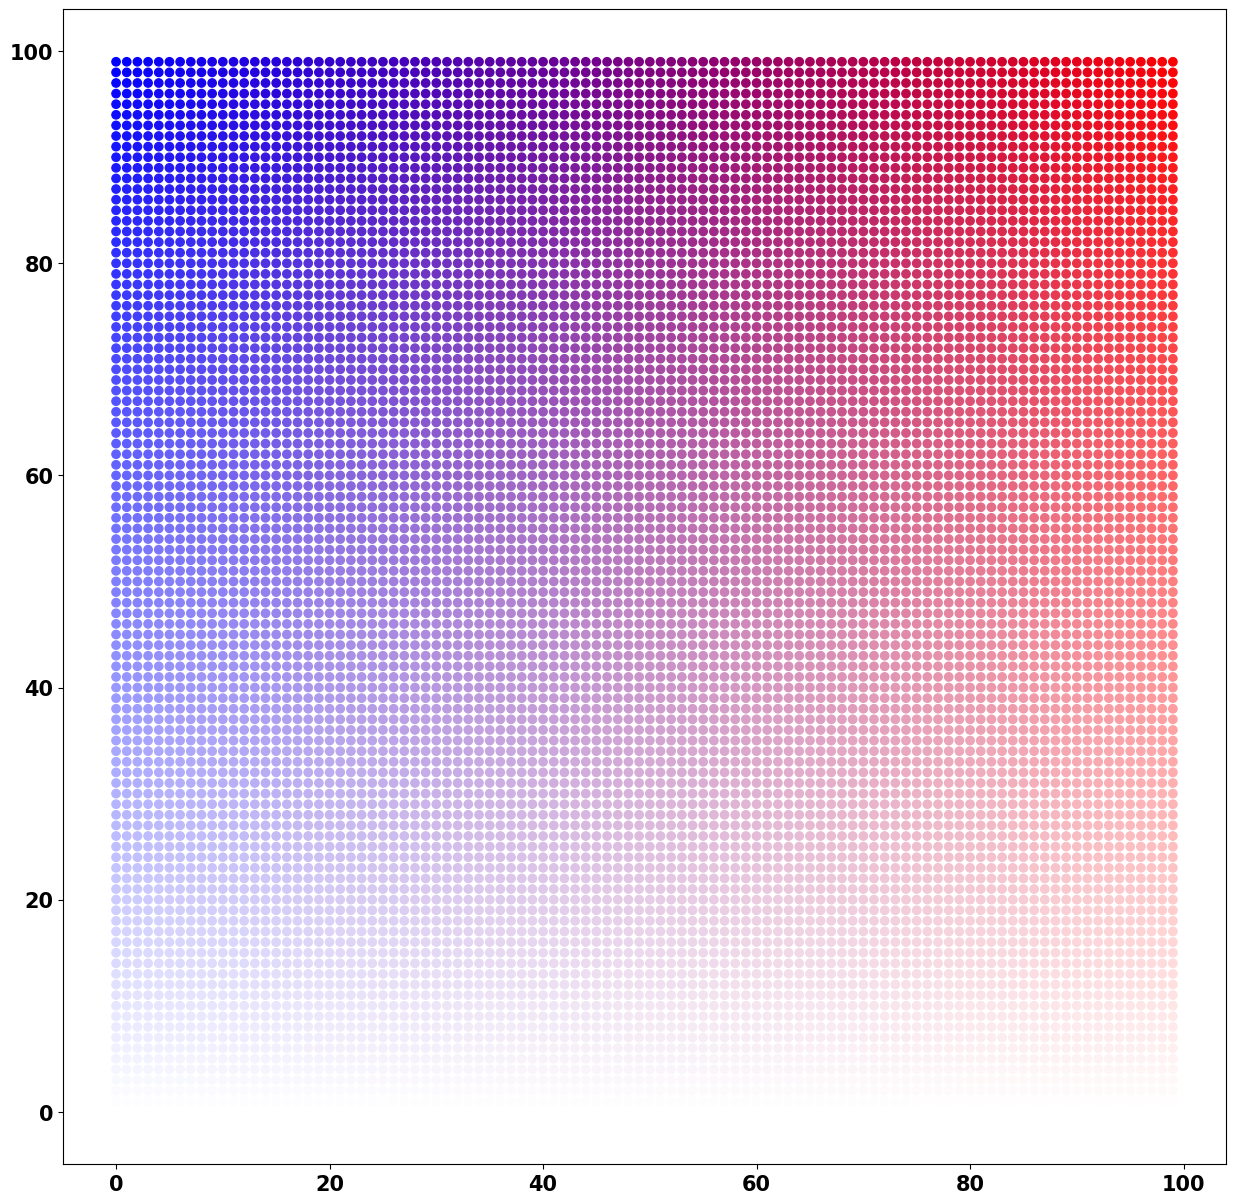

In [65]:
for i in range(100):
    cmap = ListedColormap(colorpolate(np.array([1,1,1,1]), rbcmap(i/100)))
    plt.scatter(np.zeros(100)[:] + i, range(100), c= range(100), cmap = cmap)

In [108]:
i = 0
for file in files:
    print(i)
    i = i + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31


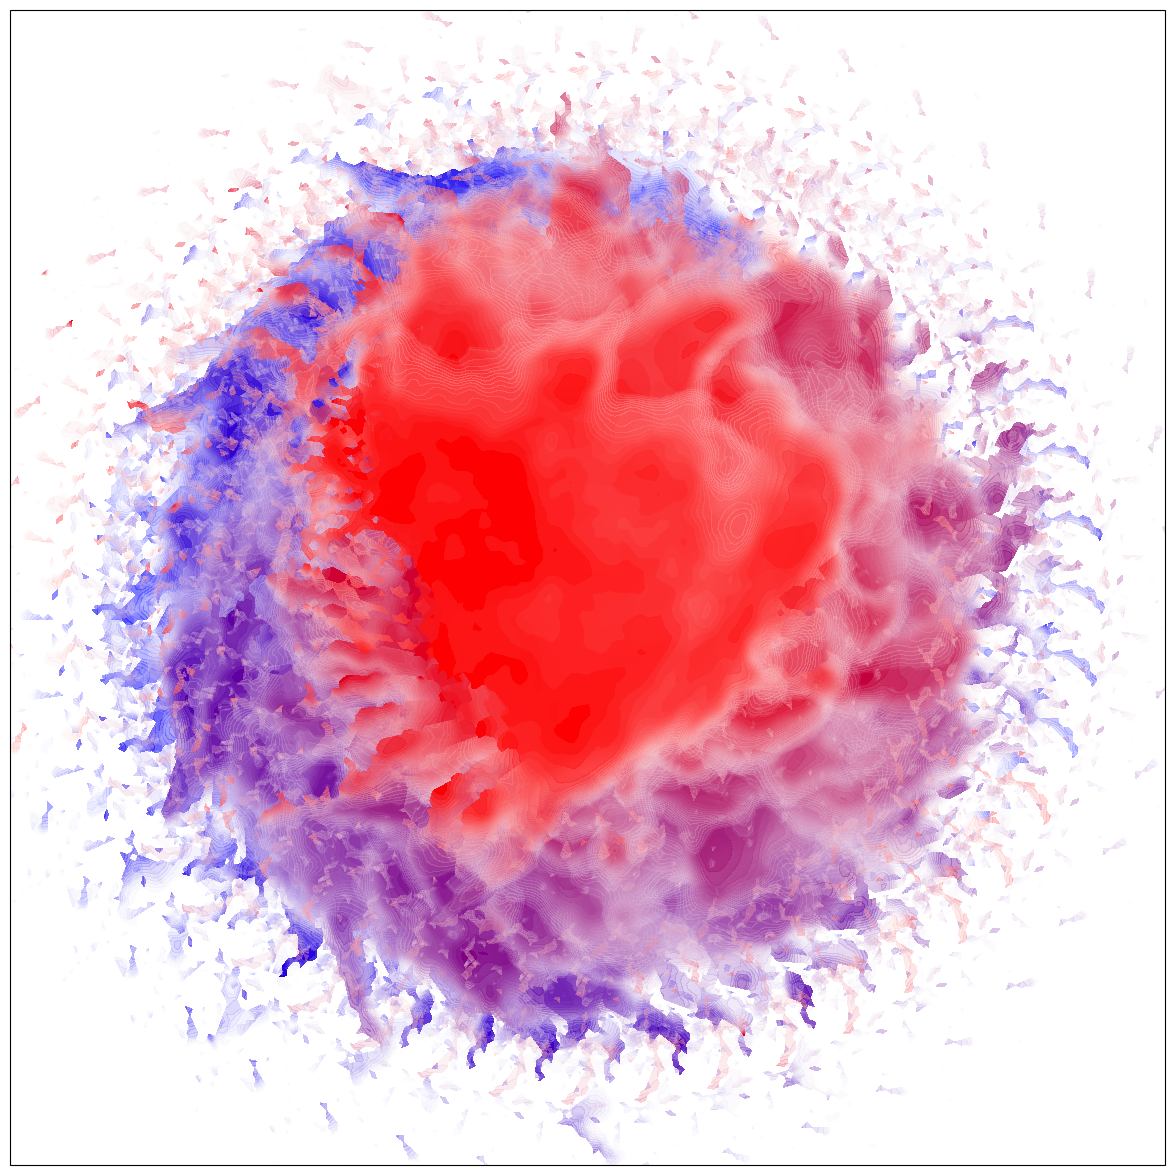

In [72]:
i = 0
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(0,90))
#ax.set_extent(-3387500.0, 3387500.0, -3387500.0, 3387500.0)


for file in files:
    print(i)
    colorList = colorpolate(np.array([1,1,1,0]), rbcmap(i/43))
    colorList[25:30][:] = np.array([1,1,1,0.5])
    colorList[226:256][:] = np.array([0,0,0,1])
    cmap = ListedColormap(colorList)
    outerextent = 1000
    innerextent = 400
    seaicetest = xr.open_dataset(str(file))
    if pd.to_datetime(seaicetest["time"]).month == 9:
        plt.contourf(seaicetest["xc"]*(outerextent - (outerextent - innerextent)*(0/44)), seaicetest["yc"]*(outerextent - (outerextent - innerextent)*(0/44)), seaicetest["ice_conc"][0], 20, 
                    transform=ccrs.LambertAzimuthalEqualArea(360*(i/44),90), extend = "both", cmap = cmap, vmin = 0, vmax = 100)

        #plt.colorbar(label = "ice concentration (%)", orientation = "horizontal", location = "bottom")
        plt.yticks()
        plt.xticks()
        if i == -1:
            ax.coastlines(resolution='50m')
            # ax.add_feature(cfeature.STATES.with_scale('10m'),
            #             linestyle='--', alpha=.1)
            ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                        linestyle='-', alpha=.3)

            gl = ax.gridlines(draw_labels=False)
        ax.set_extent([-2587500.0, 2587500.0, -2587500.0, 2587500.0], crs = ccrs.LambertAzimuthalEqualArea(360*(i/44),90))
        plt.savefig("reel2/arctic sea ice art/frame" + str(i).zfill(4), transparent = True)
        i = i + 1
    #plt.clf()

In [119]:
print(ax.get_extent())
ax.set_extent()

(-5387500.0, 5387500.0, -5387500.0, 5387500.0)


In [77]:
DEM = xr.open_dataset("data/DEM/adaptor.mars.internal-1717329668.474417-19783-16-fbe52f80-8ffa-4cf8-bbe1-f37eea8b1053.grib")
DEM

<xarray.Dataset>
Dimensions:     (time: 2, latitude: 721, longitude: 1440)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2023-07-01 2023-12-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    z           (time, latitude, longitude) float32 ...
    lsm         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-06-02T18:30 GRIB to CDM+CF via cfgrib-0.9.1...

In [78]:
lon, lat = np.meshgrid(DEM["longitude"], DEM["latitude"])

# Define the source and target projections
src_proj = ccrs.PlateCarree()
tgt_proj = ccrs.LambertAzimuthalEqualArea(0, 90)

# Convert the coordinate grid from geographic to the target projection
transformed_points = tgt_proj.transform_points(src_proj, lon, lat)

# Extract the x and y coordinates from the transformed points
x = transformed_points[..., 0]
y = transformed_points[..., 1]

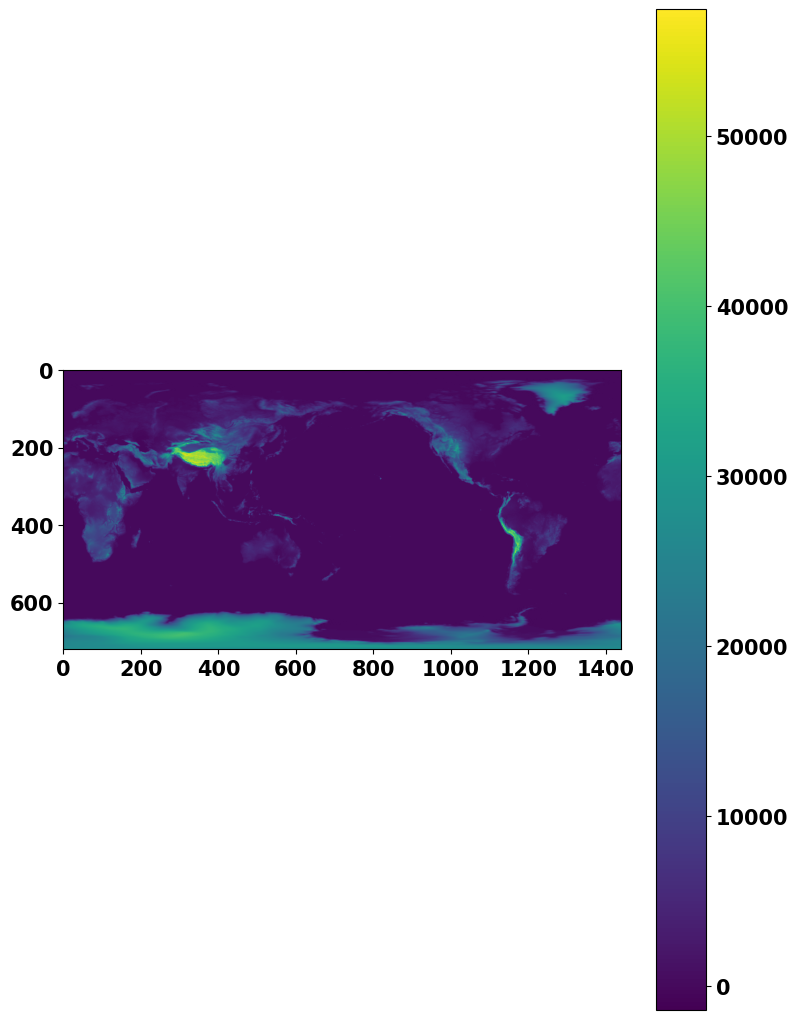

In [82]:
plt.imshow(DEM["z"][0])
plt.colorbar()

c:\Users\Karan\anaconda3\envs\ClimTA\lib\site-packages\cartopy\mpl\geoaxes.py:1655: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


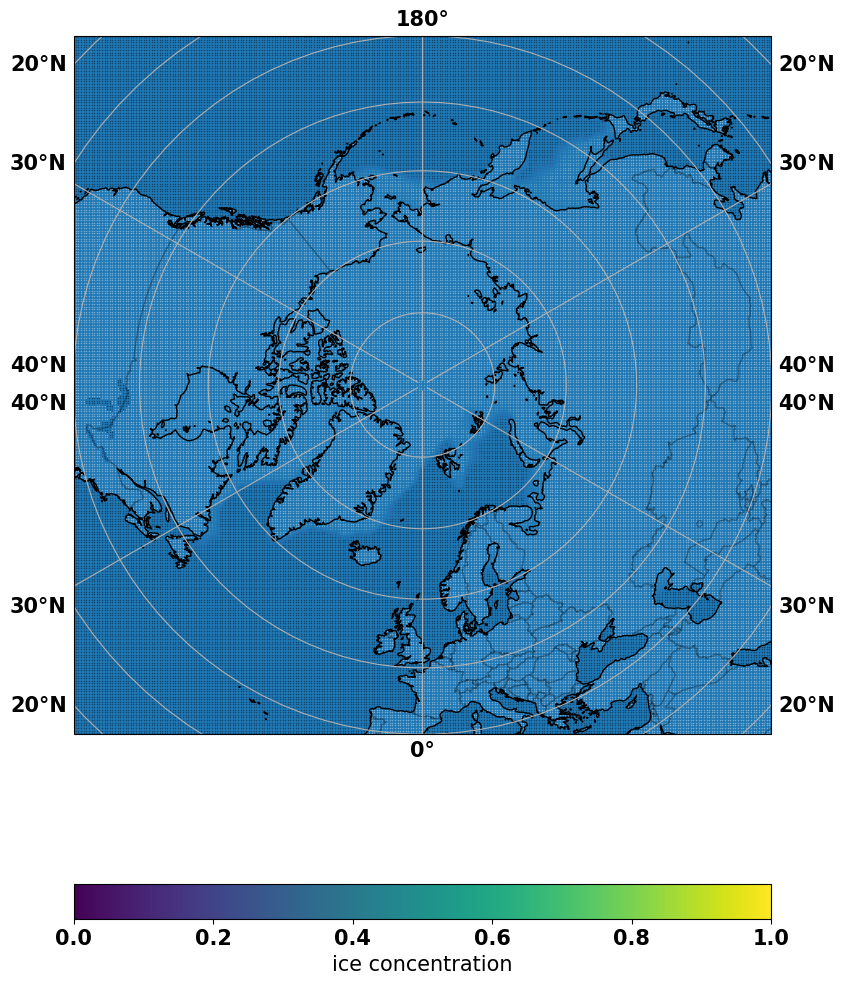

In [104]:
plt.rcParams["figure.figsize"] = (9,13)
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(0,90))
# levels = np.linspace(0, 5000, 20)
# plt.contourf(x, y, DEM["z"][0]/10, levels,transform=ccrs.LambertAzimuthalEqualArea(0,90))
siomeshgrid = np.meshgrid(seaicetest["xc"]*1000, seaicetest["yc"]*1000)
plt.contourf(seaicetest["xc"]*1000, seaicetest["yc"]*1000, seaicetest["ice_conc"][0], 20, 
            transform=ccrs.LambertAzimuthalEqualArea(0,90), extend = "both", cmap = cm.cm.ice, linewidths = 10)
plt.scatter(np.reshape(siomeshgrid[0], (-1)), np.reshape(siomeshgrid[1], (-1)),transform=ccrs.LambertAzimuthalEqualArea(0,90), s = 0.5)

plt.colorbar(label = "ice concentration", orientation = "horizontal", location = "bottom")
plt.yticks()
plt.xticks()

ax.coastlines(resolution='50m')
# ax.add_feature(cfeature.STATES.with_scale('10m'),
#             linestyle='--', alpha=.1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'),
            linestyle='-', alpha=.3)

gl = ax.gridlines(draw_labels=True)



In [130]:
plt.rcParams["figure.figsize"] = (9,13)
i = 0
iceRecord = []
iceTime = []
for file in files:
    seaicetest = xr.open_dataset(str(file))
    iceRecord.append(np.nansum(seaicetest["ice_conc"][0])*(25*25)*0.01)
    iceTime.append(seaicetest["time"])
    

In [133]:
iceTime = pd.to_datetime(np.array(iceTime))

In [123]:
def RunningAvgs(array, window):
    windAvgArray = []
    for i in range(0, len(array) - window):
        windAvgArray.append(np.nanmean(array[i: i + window]))
    return windAvgArray

In [144]:
iceTime = np.reshape(iceTime,(-1))

In [148]:
iceTime.month == 5

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

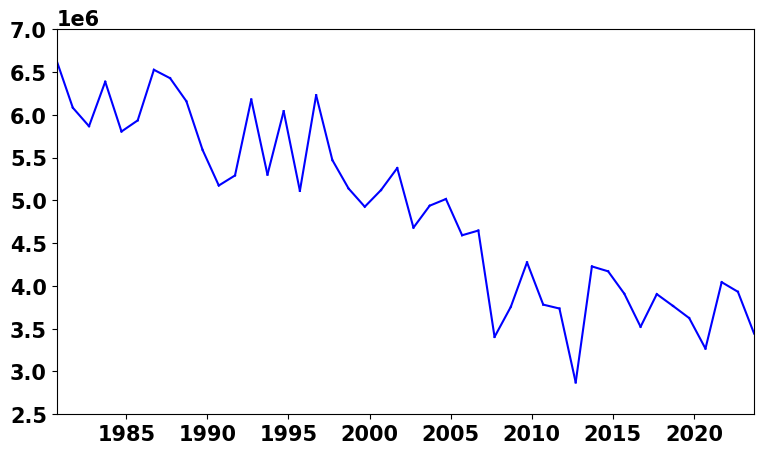

In [167]:
plt.rcParams["figure.figsize"] = (9,5)
#plt.plot(iceTime,iceRecord)
#plt.scatter(iceTime,iceRecord)
mask = iceTime.month == 9
for i in range(0,len(iceTime[mask])):
    plt.plot((iceTime[mask])[i:i+2], (np.array(iceRecord)[mask])[i:i+2], color = "blue")
    plt.xlim((iceTime[mask])[0], (iceTime[mask])[-1])
    plt.ylim(2.5e6,7e6)
    plt.savefig("reel2/arctic sea ice sept graph/frame" + str(i).zfill(4))
#plt.plot(np.reshape(iceRecord[:int(len(iceRecord)/12)*12], (-1,12))[:,4])

In [181]:

ax = plt.axes(projection=ccrs.Orthographic())
lons = np.linspace(0,360, 360)
lats = np.linspace(-90,90, 180)
field = np.zeros((180,360))
plt.contourf(lons, lats, field, transform =ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# ax.add_feature(cfeature.STATES.with_scale('10m'),
#             linestyle='--', alpha=.1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'),
            linestyle='-', alpha=.3)

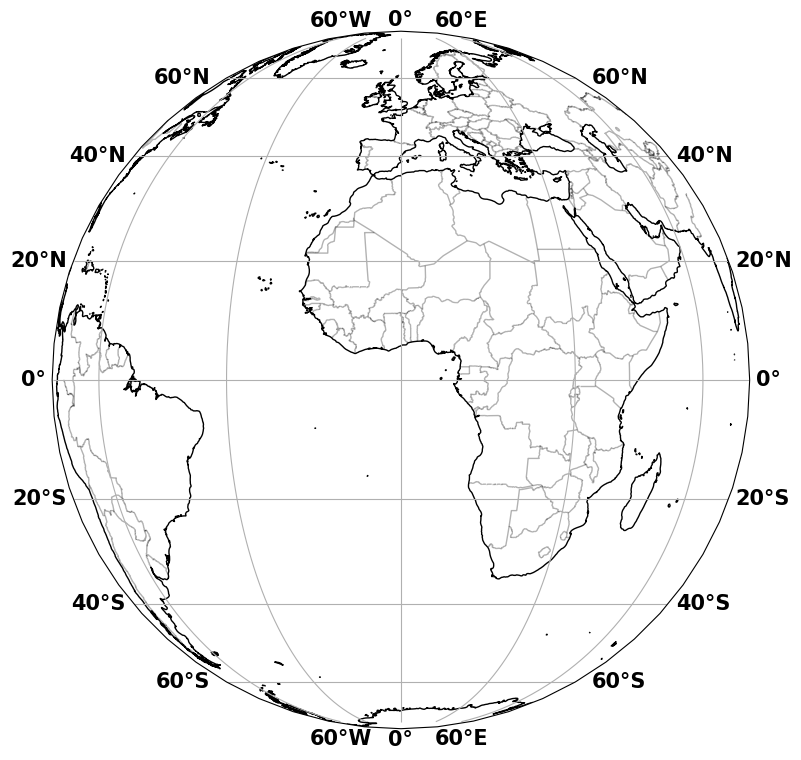

In [192]:
ax = plt.axes(projection=ccrs.Orthographic())
lons = np.linspace(-180,180, 360)
lats = np.linspace(-90,90, 180)
field = np.zeros((180,360))
field[:] = 1
plt.contourf(lons, lats, field, transform =ccrs.PlateCarree(), cmap = "jet")
ax.coastlines(resolution='50m')
# ax.add_feature(cfeature.STATES.with_scale('10m'),
#             linestyle='--', alpha=.1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'),
            linestyle='-', alpha=.3)
gl = ax.gridlines(draw_labels=True)
plt.savefig("globe.png", transparent = True)

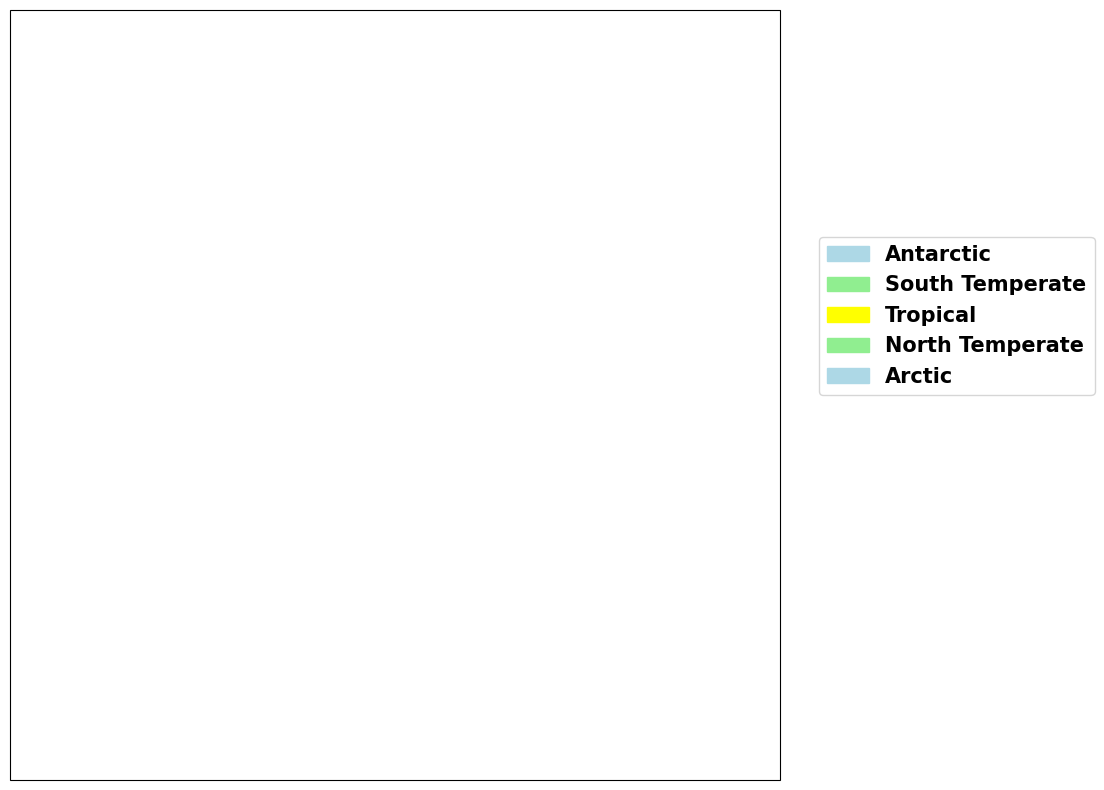

In [188]:
import matplotlib.patches as patches
# Set up the figure and axis with orthographic projection
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 0))  # Centered at the equator and prime meridian

# Draw coastlines
ax.coastlines(resolution='110m', color='black')

# Define the regions with different colors
regions = [
    {'lat_min': -90, 'lat_max': -66.5, 'color': 'lightblue'},    # Antarctic
    {'lat_min': -66.5, 'lat_max': -23.5, 'color': 'lightgreen'}, # South Temperate
    {'lat_min': -23.5, 'lat_max': 23.5, 'color': 'yellow'},      # Tropical
    {'lat_min': 23.5, 'lat_max': 66.5, 'color': 'lightgreen'},   # North Temperate
    {'lat_min': 66.5, 'lat_max': 90, 'color': 'lightblue'}       # Arctic
]

# Add patches for each region
for region in regions:
    lat_min = region['lat_min']
    lat_max = region['lat_max']
    color = region['color']
    ax.add_patch(patches.Rectangle(
        xy=[-180, lat_min], width=360, height=lat_max - lat_min,
        transform=ccrs.PlateCarree(), color=color, alpha=0.5
    ))

# Add a legend manually
legend_labels = ['Antarctic', 'South Temperate', 'Tropical', 'North Temperate', 'Arctic']
legend_colors = ['lightblue', 'lightgreen', 'yellow', 'lightgreen', 'lightblue']
patches_legend = [patches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

plt.legend(handles=patches_legend, loc='lower left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

# Display the map
plt.show()